# MNIST Classification with Keras Neural Network


This notebook demonstrates how to build a neural network using the Keras library to perform image classification on the popular MNIST dataset.
The MNIST dataset consists of 28x28 grayscale images of handwritten digits (0-9) and corresponding labels.

In this notebook, we will go through the following steps:

1. Loading and exploring the MNIST dataset.
2. Preprocessing the data by reshaping, normalizing, and one-hot encoding the labels.
3. Building a neural network model using Keras with a dense layer for classification.
4. Compiling the model with appropriate settings for optimization and loss function.
5. Training the model on the training data and monitoring its performance.
6. Evaluating the trained model on the test dataset to measure its accuracy.


Importing necessary libraries and modules and
Capture cell output using the '%%capture' magic command

In [ ]:
%%capture
from keras.datasets import mnist
import matplotlib.pyplot as plt

Loading the MNIST dataset into train and test sets

In [ ]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

Checking the data types and shapes of the train_images array

In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
train_images.dtype

dtype('uint8')

In [ ]:
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

Displaying an example image from the dataset (train and test)

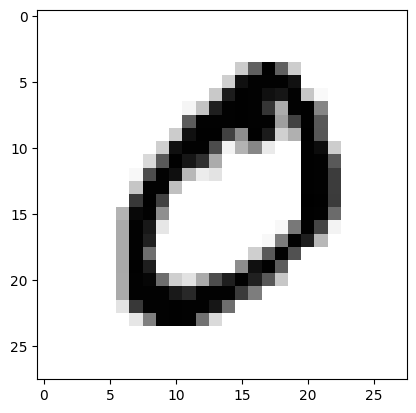

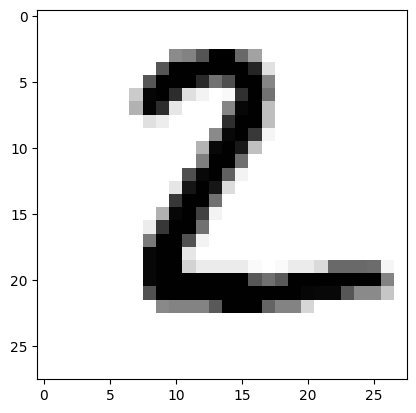

In [ ]:
plt.imshow(train_images[1,:,:], cmap = plt.cm.binary)
plt.show()
plt.imshow(test_images[1,:,:], cmap = plt.cm.binary)
plt.show()

Checking the data types and shapes of the train_labels and test_labels array

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
train_labels.shape

(60000,)

In [ ]:
train_labels[1]

0

In [ ]:
train_labels[2]

4

In [ ]:
type(test_images)

numpy.ndarray

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_images.ndim

3

In [ ]:
test_labels.shape

(10000,)

Preprocessing the data: Reshaping and normalizing the images

In [ ]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255

In [ ]:
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32")/255

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
test_images.shape

(10000, 784)

Preprocessing the labels: One-hot encoding the labels

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Building the neural network model

In [ ]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()

Adding a dense layer with ReLU activation function for 512 units and specifying input shape                                                                       
Adding the output layer with softmax activation function for 10 classes

In [ ]:
model.add(layers.Dense(512, activation = "relu", input_shape = (28*28, )))
model.add(layers.Dense(10, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Compiling the model with RMSprop optimizer, categorical cross-entropy loss, and accuracy metric

In [ ]:
model.compile(optimizer= "rmsprop",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

Training the model on the training data

In [ ]:
model.fit(train_images,
         train_labels,
         epochs = 10,
         batch_size = 128)

Epoch 1/10
469/469 [==============================] - 6s 10ms/step - loss: 0.2655 - accuracy: 0.9233
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1067 - accuracy: 0.9681
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0703 - accuracy: 0.9790
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0513 - accuracy: 0.9848
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0378 - accuracy: 0.9889
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0289 - accuracy: 0.9913
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0222 - accuracy: 0.9938
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0176 - accuracy: 0.9950
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0131 - accuracy: 0.9965
Epoch 10/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0094 - accura

Evaluating the model on the test data

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss : ", test_loss,"\ntest_acc : ", test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0673 - accuracy: 0.9813
test_loss :  0.06734034419059753 
test_acc :  0.9812999963760376


Predicting labels for test images using the trained model

In [ ]:
import numpy as np
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


Getting the index of the class with the highest probability as the predicted label

In [ ]:
predicted_labels = [np.argmax(prediction) for prediction in predictions]

Getting the actual labels of the test images (before one-hot encoding)

In [ ]:
actual_labels = [np.argmax(label) for label in test_labels]

Printing predicted and actual labels for the first 10 test images

In [ ]:
print("Predicted Labels\tActual Labels")
print("-------------------------------------")
for i in range(10):
    print(f"{predicted_labels[i]}\t\t\t{actual_labels[i]}")

Predicted Labels	Actual Labels
-------------------------------------
7			7
2			2
1			1
0			0
4			4
1			1
4			4
9			9
5			5
9			9
